# Import thư viện cần thiết


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from collections import Counter
from unidecode import unidecode

# Module for copying data to clipboard
from pandas.io import clipboard

# Show all columns
pd.set_option("display.max_columns", None)

# 1. Giới thiệu về tập dữ liệu


Đây là tập dữ liệu thống kê về các video được đăng tải trên TikTok có chủ đề liên quan đến ẩm thực.


# 2. Tìm hiểu về tập dữ liệu thô


## 2.1. Đọc tập dữ liệu thô


Xác định trước kiểu dữ liệu cho một số cột đặc biệt:

- Các cột "id" sẽ có kiểu dữ liệu `str` thay vì `int` vì không cần thực hiện phép toán số học trên cột này.
- Các cột dữ liệu chứa giá trị dạng phân loại cũng sẽ có kiểu dữ liệu `str` thay vì `int` vì không cần thực hiện phép toán số học trên cột này.
<!-- - Các cột "date" sẽ có kiểu dữ liệu `datetime` thay vì `str` vì cần thực hiện phép toán liên quan đến thời gian. -->


In [2]:
# Define data types for some columns
dtypes = {
    "id": np.object_,
    "video.id": np.object_,
    "video.videoID": np.object_,
    "user.commerceUserInfo.category": np.object_,
    "user.commerceUserInfo.categoryButton": np.object_,
    "BAInfo": np.object_,
    "user.bioLink.link": np.object_,
    "CategoryType": np.object_,
    "author.commentSetting": np.object_,
    "author.downloadSetting": np.object_,
    "author.duetSetting": np.object_,
    "author.id": np.object_,
    "author.relation": np.object_,
    "author.secUid": np.object_,
    "author.stitchSetting": np.object_,
    "author.uniqueId": np.object_,
    "createTime": np.object_,
    "diversificationId": np.object_,
    "duetDisplay": np.object_,
    "itemCommentStatus": np.object_,
    "music.id": np.object_,
    "stitchDisplay": np.object_,
    "video.claInfo.captionsType": np.object_,
    "video.claInfo.originalLanguageInfo.languageID": np.object_,
    "video.codecType": np.object_,
    "video.definition": np.object_,
    "collectTime": np.object_,
    "poi.cityCode": np.object_,
    "poi.id": np.object_,
    "poi.ttTypeCode": np.object_,
    "poi.type": np.object_,
    "poi.countryCode": np.object_,
    "user.canExpPlaylist": np.object_,
    "user.ftc": np.object_,
    "user.id": np.object_,
    "user.isADVirtual": np.object_,
    "user.isEmbedBanned": np.object_,
    "user.privateAccount": np.object_,
    "author.openFavorite": np.object_,
    "author.verified": np.object_,
    "isAd": np.object_,
    "music.isCopyrighted": np.object_,
    "music.original": np.object_,
    "textTranslatable": np.object_,
    "video.claInfo.enableAutoCaption": np.object_,
    "video.claInfo.hasOriginalAudio": np.object_,
}

Đọc dữ liệu vào `DataFrame`, sử dụng phép ánh xạ để xác định trước kiểu dữ liệu cho một số cột đặc biệt.


In [3]:
video_df = pd.read_csv("../data/interim/final_raw_videos.csv",
                       dtype=dtypes)
video_df.info()  # memory usage: 94.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71260 entries, 0 to 71259
Columns: 174 entries, stats.diggCount to duetInfo.duetFromId
dtypes: float64(67), int64(1), object(106)
memory usage: 94.6+ MB


Xem một vài dòng dữ liệu đầu tiên:


In [4]:
video_df.head(n=2)

,stats.diggCount,stats.followerCount,stats.followingCount,stats.friendCount,stats.heart,stats.heartCount,stats.videoCount,user.bioLink.risk,user.canExpPlaylist,user.commentSetting,user.commerceUserInfo.category,user.commerceUserInfo.categoryButton,user.commerceUserInfo.commerceUser,user.commerceUserInfo.downLoadLink.android,user.commerceUserInfo.downLoadLink.ios,user.downloadSetting,user.duetSetting,user.followingVisibility,user.ftc,user.id,user.isADVirtual,user.isEmbedBanned,user.nickNameModifyTime,user.nickname,user.openFavorite,user.privateAccount,user.profileEmbedPermission,user.profileTab.showPlayListTab,user.profileTab.showQuestionTab,user.relation,user.secUid,user.secret,user.signature,user.stitchSetting,user.ttSeller,user.uniqueId,user.verified,AIGCDescription,CategoryType,author.commentSetting,author.downloadSetting,author.duetSetting,author.ftc,author.id,author.isADVirtual,author.isEmbedBanned,author.nickname,author.openFavorite,author.privateAccount,author.relation,author.secUid,author.secret,author.signature,author.stitchSetting,author.uniqueId,author.verified,authorStats.diggCount,authorStats.followerCount,authorStats.followingCount,authorStats.friendCount,authorStats.heart,authorStats.heartCount,authorStats.videoCount,backendSourceEventTracking,collected,createTime,desc,digged,diversificationId,duetDisplay,forFriend,id,isAd,isPinnedItem,itemCommentStatus,item_control.can_repost,music.authorName,music.duration,music.id,music.isCopyrighted,music.original,music.private,music.title,officalItem,originalItem,playlistId,privateItem,secret,shareEnabled,stats.collectCount,stats.commentCount,stats.playCount,stats.shareCount,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.repostCount,statsV2.shareCount,stitchDisplay,textLanguage,textTranslatable,video.VQScore,video.bitrate,video.claInfo.captionsType,video.claInfo.enableAutoCaption,video.claInfo.hasOriginalAudio,video.claInfo.originalLanguageInfo.canTranslateRealTimeNoCheck,video.claInfo.originalLanguageInfo.language,video.claInfo.originalLanguageInfo.languageCode,video.claInfo.originalLanguageInfo.languageID,video.codecType,video.definition,video.duration,video.encodeUserTag,video.encodedType,video.format,video.height,video.id,video.ratio,video.videoID,video.videoQuality,video.volumeInfo.Loudness,video.volumeInfo.Peak,video.width,collectTime,duetEnabled,stitchEnabled,video.claInfo.noCaptionReason,adAuthorization,isECVideo,item_control.can_comment,item_control.can_creator_redirect,item_control.can_music_redirect,item_control.can_share,music.album,poi.address,poi.category,poi.city,poi.cityCode,poi.country,poi.countryCode,poi.fatherPoiId,poi.fatherPoiName,poi.id,poi.name,poi.province,poi.ttTypeCode,poi.ttTypeNameMedium,poi.ttTypeNameSuper,poi.ttTypeNameTiny,poi.type,poi.typeCode,music.scheduleSearchTime,aigcLabelType,itemMute,music.coverLarge,music.coverMedium,music.coverThumb,brandOrganicType,imagePost.cover.imageHeight,imagePost.cover.imageWidth,imagePost.shareCover.imageHeight,imagePost.shareCover.imageWidth,imagePost.title,titleLanguage,titleTranslatable,BAInfo,adLabelVersion,maskType,user.bioLink.link,user.roomId,author.roomId,duetInfo.duetFromId
0,0,411000.0,9398.0,4075.0,6800000.0,6800000.0,774.0,0.0,True,0.0,Food & Beverage,False,True,NaN,NaN,3.0,3.0,2.0,False,7009454289408099355,False,False,1.669470e+09,Ông Duy MUKBANG,False,False,1.0,True,True,0.0,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,False,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,False,ongduymukbang,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
video_df["author.commentSetting"].value_counts()

author.commentSetting
0.0    70996
Name: count, dtype: int64

## 2.2. Đếm số hàng và số cột của tập dữ liệu


Chúng ta sẽ kiểm tra kích thước của tập dữ liệu bằng cách sử dụng thuộc tính `shape` của `DataFrame`.


In [6]:
# Get the number of rows and columns in the DataFrame
nrows, ncols = video_df.shape

# Display the number of rows and columns in the DataFrame
print(f"Tập dữ liệu thô có {nrows} hàng và {ncols} cột.")

Tập dữ liệu thô có 71260 hàng và 174 cột.


**Nhận xét:**

- Tập dữ liệu thô có **71260 hàng** và **174 cột**.


## 2.3. Ý nghĩa của mỗi hàng trong tập dữ liệu


Mỗi hàng là thông tin thống kê của 1 video trên TikTok.


## 2.4. Mô tả về các cột trong tập dữ liệu


Dưới đây là một số giải thích về ý nghĩa của các cột dữ liệu được crawl từ TikTok thông qua TikTok‑API. Lưu ý rằng không phải tất cả các trường đều có tài liệu chính thức công bố, nên một số giải thích dựa vào cách đặt tên và kinh nghiệm sử dụng API.

---

### 1. Các trường chung về nội dung và quảng cáo

- **AIGCDescription:** Mô tả liên quan đến nội dung do AI tạo ra (AI‑generated content).
- **BAInfo:** Có thể chứa thông tin phân tích, hoặc dữ liệu liên quan đến quảng cáo – thông tin này đôi khi được dùng để phân loại hay gắn nhãn video.
- **CategoryType:** Xác định loại danh mục hoặc chủ đề mà video thuộc về.
- **adAuthorization:** Thông tin xác nhận hoặc cấp quyền liên quan đến quảng cáo.
- **adLabelVersion:** Phiên bản của nhãn quảng cáo, có thể dùng để theo dõi thay đổi hoặc cập nhật từ hệ thống quảng cáo.
- **aigcLabelType:** Loại nhãn liên quan đến nội dung AI, có thể giúp phân biệt giữa nội dung do người tạo ra và nội dung do AI tạo ra.

---

### 2. Thông tin về tác giả (author, authorStats & user)

#### Thông tin chi tiết tài khoản (author và user)

- **author.commentSetting / user.commentSetting:** Cài đặt cho phép hay không cho phép người dùng bình luận trên video của tác giả.
- **author.downloadSetting / user.downloadSetting:** Cài đặt cho phép tải xuống video hay không.
- **author.duetSetting / user.duetSetting:** Cài đặt cho phép thực hiện tính năng duet (hát cùng, ghép video) với video của tác giả.
- **author.ftc / user.ftc:** Có thể liên quan đến tuân thủ quy định của FTC (Ủy ban Thương mại Liên bang) hoặc quy định minh bạch khi quảng bá sản phẩm.
- **author.id / user.id:** ID duy nhất của tài khoản tác giả/người dùng.
- **author.isADVirtual / user.isADVirtual:** Cờ cho biết tài khoản có phải là tài khoản “ảo” phục vụ mục đích quảng cáo hay không.
- **author.isEmbedBanned / user.isEmbedBanned:** Xác định xem nội dung của tài khoản có bị cấm nhúng trên các trang khác hay không.
- **author.nickname / user.nickname:** Tên hiển thị (nickname) của tài khoản.
- **author.openFavorite / user.openFavorite:** Cho biết liệu danh sách video yêu thích có được công khai hay không.
- **author.privateAccount / user.privateAccount:** Cờ cho biết tài khoản được đặt ở chế độ riêng tư hay không.
- **author.relation / user.relation:** Thông tin về mối quan hệ giữa tài khoản của bạn và tài khoản đó (ví dụ: đang theo dõi, bạn bè…).
- **author.roomId / user.roomId:** ID phòng livestream hoặc phòng chat của tài khoản (nếu có).
- **author.secUid / user.secUid:** ID bảo mật duy nhất (một dạng mã hóa riêng) của tài khoản.
- **author.secret / user.secret:** Một cờ hoặc mã bảo mật liên quan đến tài khoản.
- **author.signature / user.signature:** Phần tiểu sử hoặc chữ ký của tài khoản, thường chứa mô tả ngắn về bản thân.
- **author.stitchSetting / user.stitchSetting:** Cài đặt cho phép hay không cho phép thực hiện tính năng “stitch” (ghép nối video).
- **author.uniqueId / user.uniqueId:** Username độc đáo, dùng để định danh công khai tài khoản.
- **user.nickNameModifyTime:** Thời điểm tài khoản thay đổi nickname lần cuối.
- **user.profileEmbedPermission:** Quyền cho phép nhúng nội dung từ trang cá nhân của người dùng.
- **user.profileTab.showPlayListTab / user.profileTab.showQuestionTab:** Cài đặt hiển thị các tab như playlist hoặc Q&A trên trang cá nhân.
- **user.followingVisibility:** Cho biết danh sách người theo dõi hay đang theo dõi của tài khoản có được hiển thị công khai hay không.
- **user.ttSeller:** Cờ xác định xem tài khoản có hoạt động thương mại (bán hàng) trên TikTok hay không.

#### Thống kê của tác giả

- **authorStats.diggCount:** Tổng số lượt “like” (digg) mà tác giả nhận được.
- **authorStats.followerCount:** Số lượng người theo dõi tài khoản.
- **authorStats.followingCount:** Số lượng tài khoản mà tác giả đang theo dõi.
- **authorStats.friendCount:** Số bạn bè (thường là mối quan hệ hai chiều).
- **authorStats.heart / authorStats.heartCount:** Tổng số “trái tim” (lượt thích) mà tài khoản nhận được.
- **authorStats.videoCount:** Số lượng video mà tác giả đã đăng tải.

#### Thông tin liên quan đến thương mại (user.commerceUserInfo)

- **user.commerceUserInfo.category:** Danh mục sản phẩm hoặc dịch vụ nếu tài khoản hoạt động thương mại.
- **user.commerceUserInfo.categoryButton:** Cài đặt hiển thị cho danh mục thương mại (ví dụ: nút truy cập nhanh).
- **user.commerceUserInfo.commerceUser:** Cờ cho biết tài khoản có liên quan đến thương mại hay bán hàng.
- **user.commerceUserInfo.downLoadLink.android / user.commerceUserInfo.downLoadLink.ios:** Đường dẫn tải ứng dụng hoặc sản phẩm dành cho hệ điều hành Android/iOS.

---

### 3. Thông tin và cài đặt liên quan đến video

#### Thông tin chung về video

- **createTime:** Thời gian video được tạo ra (thường là dạng timestamp).
- **desc:** Nội dung mô tả hoặc caption của video.
- **id / video.id / video.videoID:** ID duy nhất của video.
- **digged:** Cho biết video đã được “like” (digg) bởi người dùng truy vấn hay chưa.
- **diversificationId:** ID dùng để đa dạng hóa nội dung trong hệ thống gợi ý.

#### Thống kê và số liệu video

- **stats:** Tập hợp các số liệu thống kê của video, bao gồm:
  - **collectCount:** Số lượt lưu video.
  - **commentCount:** Số lượt bình luận.
  - **diggCount:** Số lượt thích.
  - **heart / heartCount:** Tổng số “trái tim” hoặc lượt thích tích lũy.
  - **playCount:** Số lượt xem.
  - **shareCount:** Số lượt chia sẻ.
  - **videoCount:** (Có thể là số video liên quan, nhưng thông thường số liệu này dành cho tác giả).
- **statsV2:** Phiên bản cập nhật của các chỉ số thống kê, có thể bao gồm thêm:
  - **repostCount:** Số lượt đăng lại video.

#### Thông tin kỹ thuật video

- **video.VQScore:** Điểm chất lượng của video do TikTok tính toán.
- **video.bitrate:** Bitrate của video, phản ánh chất lượng mã hóa.
- **video.definition:** Độ phân giải của video (ví dụ: HD, SD…).
- **video.duration:** Thời lượng video tính bằng giây.
- **video.format:** Định dạng file video (ví dụ: mp4).
- **video.height / video.width:** Chiều cao và chiều rộng tính bằng pixel.
- **video.ratio:** Tỷ lệ khung hình của video.
- **video.codecType:** Loại codec dùng để mã hóa video.
- **video.videoQuality:** Nhãn chất lượng video được xác định bởi hệ thống.

#### Thông tin về âm thanh và phụ đề

- **video.volumeInfo.Loudness:** Độ lớn trung bình của âm thanh trong video.
- **video.volumeInfo.Peak:** Mức âm thanh cực đại trong video.
- **video.claInfo:** Tập hợp thông tin liên quan đến phụ đề và ngôn ngữ, gồm:
  - **captionsType:** Loại phụ đề được sử dụng.
  - **enableAutoCaption:** Cho biết hệ thống có tự động tạo phụ đề hay không.
  - **hasOriginalAudio:** Xác định video có giữ âm thanh gốc hay không.
  - **noCaptionReason:** Lý do không có phụ đề (nếu có).
  - **originalLanguageInfo:** Thông tin về ngôn ngữ gốc, gồm các trường như:
    - **language, languageCode, languageID**
    - **canTranslateRealTimeNoCheck:** Có cho phép dịch theo thời gian thực không cần xác minh hay không.

#### Cài đặt tương tác và bảo mật

- **itemCommentStatus:** Trạng thái cho phép bình luận của video (ví dụ: mở, đóng).
- **itemMute:** Cờ cho biết video có bị tắt tiếng hay không.
- **item_control:** Nhóm cài đặt chi tiết liên quan đến quyền tương tác, bao gồm:
  - **can_comment:** Cho phép người dùng bình luận hay không.
  - **can_creator_redirect:** Cho phép chuyển hướng đến trang cá nhân của người tạo.
  - **can_music_redirect:** Cho phép chuyển hướng đến trang thông tin nhạc.
  - **can_repost:** Cho phép đăng lại (repost) video.
  - **can_share:** Cho phép chia sẻ video ra ngoài.
- **isAd:** Xác định video có phải là quảng cáo không.
- **isECVideo:** Cờ cho biết video có liên quan đến thương mại điện tử không.
- **isPinnedItem:** Xác định video có được ghim lên hồ sơ cá nhân hay không.
- **privateItem / secret:** Cài đặt cho video ở chế độ riêng tư hoặc bảo mật.
- **shareEnabled:** Cho phép chia sẻ video hay không.

#### Các tính năng tương tác đặc biệt

- **duetEnabled / duetDisplay / duetInfo.duetFromId:** Liên quan đến tính năng duet, cho biết:
  - Video có cho phép duet hay không.
  - Cách hiển thị khi thực hiện duet.
  - Nếu là duet, ID của video gốc được duet.
- **stitchEnabled / stitchDisplay:** Tương tự duet nhưng áp dụng cho tính năng “stitch” (ghép nối video).
- **textLanguage / textTranslatable / titleLanguage / titleTranslatable:** Các trường liên quan đến ngôn ngữ của mô tả và tiêu đề video cũng như khả năng tự động dịch.

#### Thời gian và trạng thái thu thập

- **collectTime:** Thời gian mà dữ liệu được thu thập từ TikTok.
- **collected:** Cờ xác nhận rằng dữ liệu đã được thu thập thành công.

#### Các trường dành cho bài đăng hình ảnh (imagePost)

- **imagePost.cover.imageHeight / imagePost.cover.imageWidth:** Kích thước (chiều cao/chiều rộng) của ảnh bìa cho bài đăng hình ảnh.
- **imagePost.shareCover.imageHeight / imagePost.shareCover.imageWidth:** Kích thước của ảnh được sử dụng khi chia sẻ.
- **imagePost.title:** Tiêu đề của bài đăng hình ảnh.

---

### 4. Thông tin về âm nhạc (music)

- **music.album:** Tên album chứa bài nhạc được sử dụng trong video.
- **music.authorName:** Tên của nghệ sĩ hoặc nhà sản xuất âm nhạc.
- **music.coverLarge / coverMedium / coverThumb:** Ảnh bìa của bài nhạc với các kích thước khác nhau.
- **music.duration:** Thời lượng của đoạn nhạc.
- **music.id:** ID duy nhất của bài nhạc.
- **music.isCopyrighted:** Cờ cho biết bài nhạc có được bảo hộ bản quyền hay không.
- **music.original:** Xác định xem bài nhạc có phải là nguyên bản hay không.
- **music.private:** Chỉ định bài nhạc có bị hạn chế truy cập hay không.
- **music.scheduleSearchTime:** Có thể là thời gian xếp lịch để tìm kiếm bài nhạc trong hệ thống.
- **music.title:** Tựa đề của bài nhạc.

---

### 5. Thông tin về POI (Point Of Interest – Địa điểm)

- **poi.address:** Địa chỉ của địa điểm được gắn thẻ trong video.
- **poi.category:** Danh mục hoặc loại địa điểm.
- **poi.city / poi.cityCode:** Tên và mã của thành phố nơi địa điểm đó tọa lạc.
- **poi.country / poi.countryCode:** Tên và mã quốc gia.
- **poi.fatherPoiId / poi.fatherPoiName:** Nếu địa điểm là con của một địa điểm lớn hơn, đây là ID và tên của địa điểm cha.
- **poi.id:** ID duy nhất của địa điểm.
- **poi.name:** Tên của địa điểm.
- **poi.province:** Tỉnh hoặc bang của địa điểm.
- **poi.ttTypeCode, poi.ttTypeNameMedium, poi.ttTypeNameSuper, poi.ttTypeNameTiny:** Các trường mã hóa và phân loại theo tiêu chuẩn của TikTok để xác định loại hình hoặc quy mô của địa điểm.
- **poi.type / poi.typeCode:** Loại địa điểm và mã loại tương ứng.

---

### 6. Các trường khác và theo dõi backend

- **backendSourceEventTracking:** Thông tin dùng để theo dõi các sự kiện từ phía backend của TikTok.
- **brandOrganicType:** Xác định xem video đến từ thương hiệu (official) hay là nội dung tự nhiên (organic).


## 2.5. Lấy 5 điểm dữ liệu ra làm mẫu


Trong phần này, ta sẽ lấy ra ngẫu nhiên 5 mẫu dữ liệu để quan sát. Điều này sẽ giúp ta hiểu rõ hơn về phân bố và giá trị của các cột trong bảng mô tả bên trên. Thông qua đó, ta có thể phát hiện ra các cột "bất thường" và tiến hành xử lý chúng trong các bước phân tích tiếp theo.


In [7]:
# Run this cell multiple times to see the different data samples from the DataFrame
video_df.sample(n=5)

,stats.diggCount,stats.followerCount,stats.followingCount,stats.friendCount,stats.heart,stats.heartCount,stats.videoCount,user.bioLink.risk,user.canExpPlaylist,user.commentSetting,user.commerceUserInfo.category,user.commerceUserInfo.categoryButton,user.commerceUserInfo.commerceUser,user.commerceUserInfo.downLoadLink.android,user.commerceUserInfo.downLoadLink.ios,user.downloadSetting,user.duetSetting,user.followingVisibility,user.ftc,user.id,user.isADVirtual,user.isEmbedBanned,user.nickNameModifyTime,user.nickname,user.openFavorite,user.privateAccount,user.profileEmbedPermission,user.profileTab.showPlayListTab,user.profileTab.showQuestionTab,user.relation,user.secUid,user.secret,user.signature,user.stitchSetting,user.ttSeller,user.uniqueId,user.verified,AIGCDescription,CategoryType,author.commentSetting,author.downloadSetting,author.duetSetting,author.ftc,author.id,author.isADVirtual,author.isEmbedBanned,author.nickname,author.openFavorite,author.privateAccount,author.relation,author.secUid,author.secret,author.signature,author.stitchSetting,author.uniqueId,author.verified,authorStats.diggCount,authorStats.followerCount,authorStats.followingCount,authorStats.friendCount,authorStats.heart,authorStats.heartCount,authorStats.videoCount,backendSourceEventTracking,collected,createTime,desc,digged,diversificationId,duetDisplay,forFriend,id,isAd,isPinnedItem,itemCommentStatus,item_control.can_repost,music.authorName,music.duration,music.id,music.isCopyrighted,music.original,music.private,music.title,officalItem,originalItem,playlistId,privateItem,secret,shareEnabled,stats.collectCount,stats.commentCount,stats.playCount,stats.shareCount,statsV2.collectCount,statsV2.commentCount,statsV2.diggCount,statsV2.playCount,statsV2.repostCount,statsV2.shareCount,stitchDisplay,textLanguage,textTranslatable,video.VQScore,video.bitrate,video.claInfo.captionsType,video.claInfo.enableAutoCaption,video.claInfo.hasOriginalAudio,video.claInfo.originalLanguageInfo.canTranslateRealTimeNoCheck,video.claInfo.originalLanguageInfo.language,video.claInfo.originalLanguageInfo.languageCode,video.claInfo.originalLanguageInfo.languageID,video.codecType,video.definition,video.duration,video.encodeUserTag,video.encodedType,video.format,video.height,video.id,video.ratio,video.videoID,video.videoQuality,video.volumeInfo.Loudness,video.volumeInfo.Peak,video.width,collectTime,duetEnabled,stitchEnabled,video.claInfo.noCaptionReason,adAuthorization,isECVideo,item_control.can_comment,item_control.can_creator_redirect,item_control.can_music_redirect,item_control.can_share,music.album,poi.address,poi.category,poi.city,poi.cityCode,poi.country,poi.countryCode,poi.fatherPoiId,poi.fatherPoiName,poi.id,poi.name,poi.province,poi.ttTypeCode,poi.ttTypeNameMedium,poi.ttTypeNameSuper,poi.ttTypeNameTiny,poi.type,poi.typeCode,music.scheduleSearchTime,aigcLabelType,itemMute,music.coverLarge,music.coverMedium,music.coverThumb,brandOrganicType,imagePost.cover.imageHeight,imagePost.cover.imageWidth,imagePost.shareCover.imageHeight,imagePost.shareCover.imageWidth,imagePost.title,titleLanguage,titleTranslatable,BAInfo,adLabelVersion,maskType,user.bioLink.link,user.roomId,author.roomId,duetInfo.duetFromId
69312,1366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,0.0,3.0,3.0,False,6996932747777115162,False,False,Hải Wanderlust,False,False,0.0,MS4wLjABAAAA1sxZiujI2HK2ZOeyOhMT4_w61I4Jy547Xj...,False,Bản Đồ Ăn Uy Tín 🙋🏻‍♂️Chỉ Chia Sẻ Đồ Ăn Ngon💙K...,3.0,food_wanderlust,False,60300.0,259400.0,6021.0,0.0,7200000.0,7200000.0,681.0,NaN,False,1738848488.0,Quán Bánh Canh & Hủ Tiếu Của Chị Chu Ngọc Siêu...,False,10085.0,0.0,False,7468297368002252040,False,NaN,0.0,True,Hải Wanderlust,59.0,7468297428573981456,False,True,False,nhạc nền - Hải Wanderlust,False,False,NaN,False,False,True,798.0,94.0,75600.0,593.0,798.0,94.0,1366.0,75600.0,0.0,593.0,0.0,vi,True,75.22,2223969.0,1.0,True,True,True,vie-VN,vi,1

# 3. Khám phá và tiền xử lý dữ liệu


## 3.1. Phân tích tỷ lệ trùng lặp (duplicate) và xử lý các hàng trùng lặp (nếu cần thiết)


Để tìm ra các hàng bị trùng lặp, ta sẽ dựa trên thông tin từ 3 cột cho biết ID của video là: `id`, `video.id` và `video.videoID`. Đầu tiên, ta cần kiểm tra xem có bao nhiêu hàng bị thiếu giá trị ở cả 3 cột này.


In [8]:
# Check for missing values in the ID columns
missing_id = video_df["id"].isnull().sum()
missing_video_id = video_df["video.id"].isnull().sum()

# Check if video.videoID column exists
if "video.videoID" in video_df.columns:
    missing_video_videoID = video_df["video.videoID"].isnull().sum()
    print(f"Missing values in 'id': {missing_id}")
    print(f"Missing values in 'video.id': {missing_video_id}")
    print(f"Missing values in 'video.videoID': {missing_video_videoID}")

    # Check for rows missing all three IDs
    missing_all = video_df[video_df["id"].isnull() &
                           video_df["video.id"].isnull() &
                           video_df["video.videoID"].isnull()]
    print(f"\nRows missing all three ID columns: {len(missing_all)}")
    if len(missing_all) > 0:
        print(f"Percentage: {len(missing_all)/len(video_df)*100:.2f}%")
else:
    print(f"Missing values in 'id': {missing_id}")
    print(f"Missing values in 'video.id': {missing_video_id}")
    print("Column 'video.videoID' doesn't exist in the dataframe")

    # Check for rows missing both available IDs
    missing_all = video_df[video_df["id"].isnull() &
                           video_df["video.id"].isnull()]
    print(f"\nRows missing both ID columns: {len(missing_all)}")
    if len(missing_all) > 0:
        print(f"Percentage: {len(missing_all)/len(video_df)*100:.2f}%")

Missing values in 'id': 264
Missing values in 'video.id': 264
Missing values in 'video.videoID': 5910

Rows missing all three ID columns: 264
Percentage: 0.37%


**Nhận xét:**

- Có `264` hàng bị thiếu giá trị ở cả 3 cột `id`, `video.id` và `video.videoID`. Ta sẽ loại bỏ các hàng này khỏi tập dữ liệu.


Loại bỏ các hàng bị thiếu giá trị ở cả 3 cột `id`, `video.id` và `video.videoID`. Sau đó, ta cần reset lại chỉ số của tập dữ liệu để tránh các lỗi có khả năng xảy ra trong quá trình xử lý dữ liệu.


In [9]:
# Remove rows with missing values in all ID columns
# First, let's create a copy of the dataframe to work with
df_cleaned = video_df.copy()

# Check if the rows missing all three IDs are still in the dataframe
if "video.videoID" in df_cleaned.columns:
    mask = df_cleaned["id"].isnull() & df_cleaned["video.id"].isnull(
    ) & df_cleaned["video.videoID"].isnull()
else:
    mask = df_cleaned["id"].isnull() & df_cleaned["video.id"].isnull()

# Count how many rows will be removed
rows_to_remove = mask.sum()

# Drop rows with missing values in all ID columns
df_cleaned = df_cleaned[~mask]

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Print confirmation
print(f"Trước khi loại bỏ, tập dữ liệu có {len(video_df)} hàng.")
print(f"Đã loại bỏ {rows_to_remove} hàng thiếu giá trị ở cột `video.id`.")
print(f"Tập dữ liệu sau khi loại bỏ có {len(df_cleaned)} hàng.")

# Update our main dataframe
video_df = df_cleaned

Trước khi loại bỏ, tập dữ liệu có 71260 hàng.
Đã loại bỏ 264 hàng thiếu giá trị ở cột `video.id`.
Tập dữ liệu sau khi loại bỏ có 70996 hàng.


Ta sử dụng phương thức `duplicated()` của `DataFrame` để kiểm tra xem có hàng nào xuất hiện nhiều hơn một lần hay không. Ta sẽ dùng giá trị của cột `video.id` để xác định các hàng trùng lặp. _Trong trường hợp có từ 2 hàng "giống nhau" trở lên, thì hàng đầu tiên sẽ không bị xem là trùng lặp (ta dùng tham số `keep='first'`)_.


In [10]:
# Calculate the number of duplicated rows in the DataFrame
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
num_duplicated_rows = video_df.duplicated(
    subset="video.id", keep="first").sum()
# Calculate the duplicated rate
duplicated_rate = num_duplicated_rows / nrows * 100

# Display the number of duplicated rows in the DataFrame
if num_duplicated_rows == 0:
    print("Dữ liệu không có hàng nào bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} hàng bị trùng lặp.")

# Display the duplicated rate
print(f"Suy ra, tỉ lệ hàng bị trùng lặp là {duplicated_rate:.2f}%.")

Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.


**Kết quả:**

```txt
Dữ liệu không có hàng nào bị trùng lặp!
Suy ra, tỉ lệ hàng bị trùng lặp là 0.00%.
```


**Nhận xét:**

- Từ kết quả kiểm tra, ta thấy rằng **không có hàng nào bị trùng lặp** trong tập dữ liệu thô, hay tỷ lệ trùng lặp bằng 0%. Vì mỗi hàng đại diện cho một tỷ phú cụ thể, việc không có hàng trùng lặp là một dấu hiệu tốt cho chất lượng của dữ liệu. Điều này giúp ta tiết kiệm thời gian và công sức trong việc xử lý dữ liệu.


## 3.2. Phân tích tỷ lệ thiếu giá trị ở mỗi cột (missing rate)


Ta sử dụng phương thức `isnull()` của `DataFrame` để kiểm tra xem có hàng nào trong mỗi cột bị thiếu giá trị hay không. Từ đó ta sẽ tính được tỷ lệ thiếu giá trị của mỗi cột. Ta đồng thời sắp xếp các cột theo tỷ lệ thiếu giá trị giảm dần để dễ dàng quan sát. Toàn bộ quy trình này sẽ được thực hiện thông qua hàm `missing_values_table()`.


In [11]:
def display_missing_statistics(df: pd.DataFrame):
    """ Helper function to display the missing values count
    and rate for each column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.io.formats.style.Styler: 
        The missing values count and rate for each column
        in the DataFrame
    """

    # Count the number of missing values in each column
    missing_df = (
        df.isnull().sum()
          .to_frame(name="Missing Values Count")
          .reset_index(names="Column Name")
    )

    # Sort the columns by the number of missing values
    missing_df = missing_df.sort_values(
        by="Missing Values Count",
        ascending=False
    )

    # Calculate the missing rate for each column
    missing_df["Missing Rate (Percent)"] = \
        missing_df["Missing Values Count"] / len(df) * 100

    # Display the missing values count and rate for each column
    # Hide the index for better visualization
    return missing_df.style.hide()

Khi này, ta gọi hàm `missing_values_table()` để phân tích tỷ lệ thiếu giá trị của các cột trong tập dữ liệu.


In [12]:
# # Get the LaTeX representation of the missing values count and rate
# # for each column in the DataFrame
# clipboard.copy(display_missing_statistics(df).to_latex())

In [13]:
# Display the missing values count and rate
# for each column in the DataFrame
display_missing_statistics(video_df)

Column Name,Missing Values Count,Missing Rate (Percent)
stats.followerCount,70996,100.000000
stats.followingCount,70996,100.000000
stats.heart,70996,100.000000
stats.friendCount,70996,100.000000
stats.heartCount,70996,100.000000
stats.videoCount,70996,100.000000
user.commerceUserInfo.category,70996,100.000000
user.bioLink.risk,70996,100.000000
user.canExpPlaylist,70996,100.000000
user.commentSetting,70996,100.000000


Trực quan hóa kết quả:


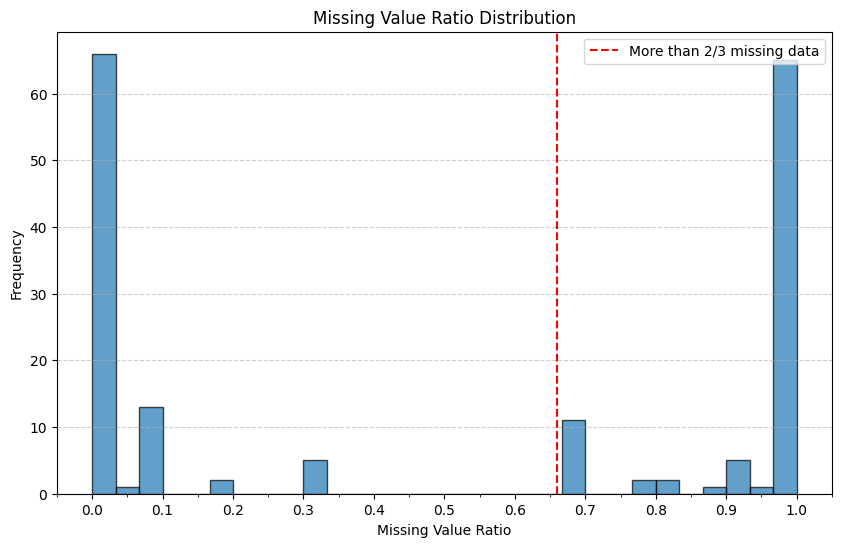

In [14]:
# Plot the missing values distribution
plt.figure(figsize=(10, 6))
missing_ratio = video_df.isnull().sum() / len(video_df)
plt.hist(missing_ratio, bins=30, edgecolor="black", alpha=0.7)

# Add labels and title
plt.title("Missing Value Ratio Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xlabel("Missing Value Ratio")
plt.ylabel("Frequency")

# Set xticks and xticks labels
plt.xticks(np.arange(0, 1.1, 0.1))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.05))

# Add a line to count number of columns missing more than 2/3 of the data
plt.axvline(x=0.66, color="red", linestyle="--",
            label="More than 2/3 missing data")
plt.legend()
plt.show()

**Nhận xét:**

- Dựa trên kết quả phân tích dữ liệu, ta thấy rất nhiều cột có **tỷ lệ thiếu giá trị khá cao**, **trên 66.67%** (tức là thiếu khoảng 2/3 dữ liệu). Đây là các cột không đủ chất lượng để sử dụng trong quá trình phân tích, nên ta sẽ loại bỏ các cột này khỏi tập dữ liệu.


### 3.2.1. Loại bỏ các cột có tỷ lệ thiếu giá trị cao


Loại bỏ các cột có tỷ lệ thiếu giá trị **trên 66.67%** khỏi tập dữ liệu. Sau đó, ta cần reset lại chỉ số của tập dữ liệu để tránh các lỗi có khả năng xảy ra trong quá trình xử lý dữ liệu.


In [15]:
# Find columns with missing rate greater than 66.67%
missing_rate_threshold = 2 / 3 * 100
missing_rate_mask = video_df.isnull().mean() * 100 > missing_rate_threshold
columns_missing_above_threshold = video_df.columns[missing_rate_mask]
print(f"Có {len(columns_missing_above_threshold)} cột có tỉ lệ giá trị thiếu lớn hơn {missing_rate_threshold:.2f}%.")

Có 87 cột có tỉ lệ giá trị thiếu lớn hơn 66.67%.


In [16]:
# Get the number of columns before dropping
n_cols_before = video_df.shape[1]

# Drop columns with missing rate greater than 70%
video_df = video_df.drop(columns=columns_missing_above_threshold,
                         axis=1, errors="ignore")

# Print confirmation
print(f"Trước khi loại bỏ, tập dữ liệu có {n_cols_before} cột.")
print(f"Đã loại bỏ {len(columns_missing_above_threshold)} cột có tỉ lệ giá trị thiếu lớn hơn {missing_rate_threshold:.2f}%.")
print(f"Tập dữ liệu sau khi loại bỏ có {video_df.shape[1]} cột.")

Trước khi loại bỏ, tập dữ liệu có 174 cột.
Đã loại bỏ 87 cột có tỉ lệ giá trị thiếu lớn hơn 66.67%.
Tập dữ liệu sau khi loại bỏ có 87 cột.


## 3.3. Phân tích kiểu dữ liệu của mỗi cột và xử lý các cột có kiểu dữ liệu chưa phù hợp (nếu cần)


Ta sẽ sử dụng thuộc tính `dtypes` của `DataFrame` để kiểm tra kiểu dữ liệu của mỗi cột trong tập dữ liệu. Điều này giúp ta xác định xem có cột nào có kiểu dữ liệu chưa phù hợp với nội dung của nó hay không. Toàn bộ quy trình này sẽ được thực hiện thông qua hàm `display_data_types()`.


In [17]:
def display_data_types(df: pd.DataFrame):
    """ Helper function to display the data types
    of each column in the DataFrame

    Args:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.io.formats.style.Styler: 
        The data types of each column in the DataFrame
    """

    # Get the data types of each column in the DataFrame
    data_types_df = df.dtypes \
                      .to_frame(name="Data Type") \
                      .reset_index(names="Column Name")

    # Display the data types of each column in the DataFrame
    # Hide the index for better visualization
    return data_types_df.style.hide()

**Kết quả:**


In [18]:
# # Get the LaTeX representation of the data types
# # for each column in the DataFrame
# clipboard.copy(display_data_types(df).to_latex())

In [19]:
# Display the data types for each column in the DataFrame
display_data_types(video_df)

Column Name,Data Type
stats.diggCount,int64
CategoryType,object
author.commentSetting,object
author.downloadSetting,object
author.duetSetting,object
author.ftc,object
author.id,object
author.isADVirtual,object
author.isEmbedBanned,object
author.nickname,object


**Nhận xét:**

- Ta thấy hai cột `collectTime` và `createTime` đang có kiểu dữ liệu `object` thay vì `datetime`. Vì hai cột này chứa thông tin về thời gian, việc chuyển đổi chúng sang kiểu dữ liệu `datetime` sẽ giúp ta thực hiện các phép toán hoặc phân tích thời gian một cách dễ dàng hơn. Chúng ta sẽ thực hiện việc chuyển đổi kiểu dữ liệu của hai cột này trong các bước tiếp theo.


### 3.3.1. Tiền xử lý cột `collectTime` và `createTime`


Hiển thị một vài giá trị trong cột `collectTime` và `createTime` để xem xét cách chuyển đổi kiểu dữ liệu phù hợp.


In [20]:
# # Get the LaTeX representation of
# # the first 5 rows of the `collectTime` and `createTime` columns
# clipboard.copy(video_df[["collectTime", "createTime"]].head().to_latex())

# Display first 5 rows of the `collectTime` and `createTime` columns
video_df[["collectTime", "createTime"]].head()

,collectTime,createTime
0,1742378359.0,1738758055.0
1,1742378359.0,1723728708.0
2,1742378359.0,1710335856.0
3,1742378359.0,1742299664.0
4,1742378359.0,1742126452.0


**Nhận xét:**

- Ta thấy giá trị trong cột `collectTime` và `createTime` đều có dạng timestamp, nên việc chuyển đổi kiểu dữ liệu sang `datetime` là phù hợp.


Xử lý cột `collectTime` và `createTime` để chuyển đổi kiểu dữ liệu sang `datetime`.


In [21]:
# Convert the `collectTime` and `createTime` columns
# from POSIX to datetime64[ns] data type
video_df["collectTime"] = pd.to_datetime(video_df["collectTime"], unit="s")
video_df["createTime"] = pd.to_datetime(video_df["createTime"], unit="s")

/tmp/ipykernel_3412/2398249182.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  video_df["collectTime"] = pd.to_datetime(video_df["collectTime"], unit="s")
/tmp/ipykernel_3412/2398249182.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  video_df["createTime"] = pd.to_datetime(video_df["createTime"], unit="s")


Chuyển sang múi giờ Việt Nam (GMT+7) cho cột `collectTime` và `createTime`.

In [22]:
# Change the timezone of the `collectTime` and `createTime` columns
# from UTC to Asia/Ho_Chi_Minh
video_df['createTime'] = video_df['createTime'].dt.tz_localize(
    'UTC').dt.tz_convert("Asia/Ho_Chi_Minh")
video_df['collectTime'] = video_df['collectTime'].dt.tz_localize(
    'UTC').dt.tz_convert("Asia/Ho_Chi_Minh")

Kiểm tra lại kiểu dữ liệu của cột `collectTime` và `createTime` sau khi đã chuyển đổi.


In [23]:
# Get the LaTeX representation of
# the first 5 rows of the `collectTime` and `createTime` columns
# after converting to datetime64[ns] data type
# clipboard.copy(video_df[["collectTime", "createTime"]].head().to_latex())

# Display first 5 rows of the `collectTime` and `createTime` columns
# after converting to datetime64[ns] data type
video_df[["collectTime", "createTime"]].head()

,collectTime,createTime
0,2025-03-19 16:59:19+07:00,2025-02-05 19:20:55+07:00
1,2025-03-19 16:59:19+07:00,2024-08-15 20:31:48+07:00
2,2025-03-19 16:59:19+07:00,2024-03-13 20:17:36+07:00
3,2025-03-19 16:59:19+07:00,2025-03-18 19:07:44+07:00
4,2025-03-19 16:59:19+07:00,2025-03-16 19:00:52+07:00


**Nhận xét:**

- Sau khi tiền xử lý, kiểu dữ liệu của cả hai cột `collectTime` và `createTime` đã được chuyển đổi sang `datetime` một cách chính xác. Điều này giúp cho việc phân tích dữ liệu liên quan đến thời gian trở nên dễ dàng và chính xác hơn.


Quan sát lại kiểu dữ liệu của mỗi cột trong tập dữ liệu trước khi tiến hành các bước phân tích tiếp theo.


In [24]:
# # Get the LaTeX representation of the data types
# # for each column in the DataFrame
# clipboard.copy(display_data_types(video_df).to_latex())

In [25]:
# Display the data types for each column in the DataFrame
display_data_types(video_df)

Column Name,Data Type
stats.diggCount,int64
CategoryType,object
author.commentSetting,object
author.downloadSetting,object
author.duetSetting,object
author.ftc,object
author.id,object
author.isADVirtual,object
author.isEmbedBanned,object
author.nickname,object


## 3.4. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu dạng số (numerical)


Với mỗi cột có kiểu dữ liệu dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Giá trị tối thiểu.
- Giá trị tứ phân vị thứ nhất.
- Giá trị tứ phân vị thứ hai (giá trị trung vị).
- Giá trị tứ phân vị thứ ba.
- Giá trị tối đa.


In [26]:
# Some helper functions to calculate
# the missing ratio, median, lower quartile, and upper quartile
def missing_ratio(s):
    return (s.isna().mean() * 100).round(3)


def median(df):
    return (df.quantile(0.5)).round(1)


def lower_quartile(df):
    return (df.quantile(0.25)).round(1)


def upper_quartile(df):
    return (df.quantile(0.75)).round(1)


def display_numerical_columns_statistics(num_col_df: pd.DataFrame):
    """ Display the summary statistics for numerical columns in the DataFrame

    Args:
        num_col_df (pd.DataFrame): The DataFrame containing numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for numerical columns
    """

    # Calculate some basic statistics for the numerical columns:
    # Missing ratio, minimum, lower quartile, median, upper quartile, and maximum
    num_col_info_df = num_col_df.aggregate(
        [missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

    # Transpose the DataFrame for better visualization
    num_col_info_df = num_col_info_df.T

    # Rename the columns for better interpretation
    num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Minimum",
        "Lower Quartile (Q1)", "Median (Q2)",
        "Upper Quartile (Q3)", "Maximum"
    ]

    # Display the basic statistics for the numerical columns
    return num_col_info_df.reset_index(names="Column Name").sort_values(
        by="Column Name").style.format({
            "Missing Ratio (Percent)": "{:.3f}",
            "Minimum": "{:.1f}",
            "Lower Quartile (Q1)": "{:.1f}",
            "Median (Q2)": "{:.1f}",
            "Upper Quartile (Q3)": "{:.1f}",
            "Maximum": "{:.1f}"
        }).hide()

**Kết quả:**


In [28]:
# Extract the numerical columns from the DataFrame
num_col_df = video_df.select_dtypes(include=[np.number])

In [29]:
# # Get the LaTeX representation of the summary statistics
# # for numerical columns in the DataFrame
# clipboard.copy(display_numerical_columns_statistics(num_col_df).to_latex())

# Display the summary statistics for numerical columns
display_numerical_columns_statistics(num_col_df)

Column Name,Missing Ratio (Percent),Minimum,Lower Quartile (Q1),Median (Q2),Upper Quartile (Q3),Maximum
authorStats.diggCount,0.000,16.0,1188.0,4259.0,11100.0,173000.0
authorStats.followerCount,0.000,0.0,82300.0,199900.0,381100.0,3000000.0
authorStats.followingCount,0.000,0.0,26.0,79.0,241.0,9398.0
authorStats.friendCount,0.000,0.0,0.0,0.0,0.0,0.0
authorStats.heart,0.000,71000.0,2100000.0,4800000.0,10000000.0,100200000.0
authorStats.heartCount,0.000,71000.0,2100000.0,4800000.0,10000000.0,100200000.0
authorStats.videoCount,0.000,13.0,408.0,607.0,885.0,2298.0
music.duration,0.168,1.0,57.0,81.0,130.0,1481.0
stats.collectCount,0.000,0.0,73.0,277.0,1017.0,138500.0
stats.commentCount,0.000,0.0,16.0,47.0,133.0,46900.0


Vẽ biểu đồ phân phối của các cột dạng số.


In [30]:
# Print the number of numerical columns in the DataFrame
print(f"Có {num_col_df.shape[1]} cột dạng số trong tập dữ liệu.")

Có 26 cột dạng số trong tập dữ liệu.


In [31]:
# # Create subplots for numerical columns
# fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 21))
# axes = axes.ravel()

# # Plot distribution for each numerical column
# for idx, column in enumerate(num_col_df.columns):
#     # Create distribution plot
#     sns.histplot(data=num_col_df, x=column, kde=True, ax=axes[idx])
#     axes[idx].set_title(f"Distribution of {column}")
#     axes[idx].tick_params(axis="x", rotation=45)

# # Remove empty subplots
# for idx in range(len(num_col_df.columns), len(axes)):
#     fig.delaxes(axes[idx])

# # Adjust layout
# plt.tight_layout()
# plt.show()

**Nhận xét:**

- Hai cột `authorStats.heart` và `authorStats.heartCount` có phân phối khá giống nhau. Ta nghi ngờ rằng hai cột này có thể chứa những thông tin trùng lặp. Để kiểm tra giả thuyết này, ta sẽ thực hiện phân tích tương quan giữa hai cột này trong bước tiếp theo.

- Có vẻ như các cột liên quan đến thống kê của video, bắt đầu bằng `stats.*` sẽ chứa thông tin trùng lặp với các cột tương ứng nhưng bắt đầu bằng `statsV2.*`. Ta có thể loại bỏ các cột thừa này khỏi tập dữ liệu.

- Các cột `authorStats.friendCount` và `statsV2.repostCount` đều chỉ chứa 1 giá trị duy nhất. Thông tin từ 2 cột này có thể sẽ không cần thiết cho quá trình phân tích, nên ta sẽ loại bỏ chúng khỏi tập dữ liệu.


## 3.4. Phân tích phân bố của các giá trị trong mỗi cột có kiểu dữ liệu không phải dạng số (non-numerical)


Với mỗi cột có kiểu dữ liệu không phải dạng số, ta sẽ tính:

- Tỷ lệ thiếu giá trị (từ 0 đến 100).
- Số lượng các giá trị khác nhau.
- Tỷ lệ xuất hiện (từ 0 đến 100) của mỗi giá trị.


In [32]:
# Some helper functions to calculate
# the missing ratio, number of unique values, and value ratios
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)


def num_values(s):
    return len(s.value_counts())


def value_ratios(s):
    # Calculate the value ratios for each unique value in the Series
    total_count = (~s.isna()).sum()
    ratios = (s.value_counts() / total_count * 100).round(1)

    # Convert the index to string for better display
    ratios.index = ratios.index.astype(str)

    return ratios.to_dict()


def display_non_numerical_columns_statistics(non_num_col_df: pd.DataFrame):
    """ Display the summary statistics for non-numerical columns in the DataFrame

    Args:
        non_num_col_df (pd.DataFrame): The DataFrame containing non-numerical columns

    Returns:
        pd.io.formats.style.Styler: The summary statistics for non-numerical columns
    """

    # Calculate the missing ratio, number of unique values, and value ratios
    # for each non-numerical column
    non_num_col_info_df = non_num_col_df.aggregate(
        [missing_ratio, num_values, value_ratios])

    # Transpose the DataFrame for better visualization
    non_num_col_info_df = non_num_col_info_df.T

    # Rename the columns for better interpretation
    non_num_col_info_df.columns = [
        "Missing Ratio (Percent)", "Number of Unique Values", "Value Ratios"
    ]

    # Display the basic statistics for the non-numerical columns
    # Only show first 5 values in column "Value Ratios"
    return non_num_col_info_df.reset_index(names="Column Name").style.format({
        "Missing Ratio (Percent)": "{:.1f}",
        "Number of Unique Values": "{:,.0f}",
        "Value Ratios": lambda x: dict(list(x.items())[:6])
    }).hide()

**Kết quả:**


In [33]:
# Extract non-numerical columns from the DataFrame
non_num_col_df = video_df.select_dtypes(exclude=[np.number, np.datetime64])

In [34]:
# # Get the LaTeX representation of the summary statistics
# # for non-numerical columns in the DataFrame
# clipboard.copy(display_non_numerical_columns_statistics(non_num_col_df).to_latex())

# Display the summary statistics for non-numerical columns
display_non_numerical_columns_statistics(non_num_col_df)

Column Name,Missing Ratio (Percent),Number of Unique Values,Value Ratios
CategoryType,0.0,21,"{'111.0': 87.1, '0.0': 5.6, '120.0': 2.6, '105.0': 2.4, '102.0': 0.4, '104.0': 0.3}"
author.commentSetting,0.0,1,{'0.0': 100.0}
author.downloadSetting,0.0,2,"{'0.0': 76.4, '3.0': 23.6}"
author.duetSetting,0.0,3,"{'0.0': 91.7, '3.0': 6.8, '1.0': 1.5}"
author.ftc,0.0,1,{'False': 100.0}
author.id,0.0,264,"{'7163686821477729306': 1.3, '6922569104567010305': 1.3, '7345796533974270994': 1.2, '6741580738694775809': 1.1, '7297243221116109830': 1.0, '7039230412157699074': 1.0}"
author.isADVirtual,0.0,1,{'False': 100.0}
author.isEmbedBanned,0.0,1,{'False': 100.0}
author.nickname,0.0,263,"{'Muoidian': 1.3, 'TÍNH TUNG TĂNG': 1.3, 'Thích Gì Ăn Đó': 1.2, 'Đi Cùng Phúc': 1.1, 'tunauan68': 1.0, 'Hôm nay có chút rảnh': 1.0}"
author.openFavorite,0.0,2,"{'False': 98.4, 'True': 1.6}"


Vẽ biểu đồ phân phối của các cột dạng không số.


In [35]:
# Print the number of non-numerical columns in the DataFrame
print(
    f"Có {non_num_col_df.shape[1]} cột không phải dạng số trong tập dữ liệu.")

Có 61 cột không phải dạng số trong tập dữ liệu.


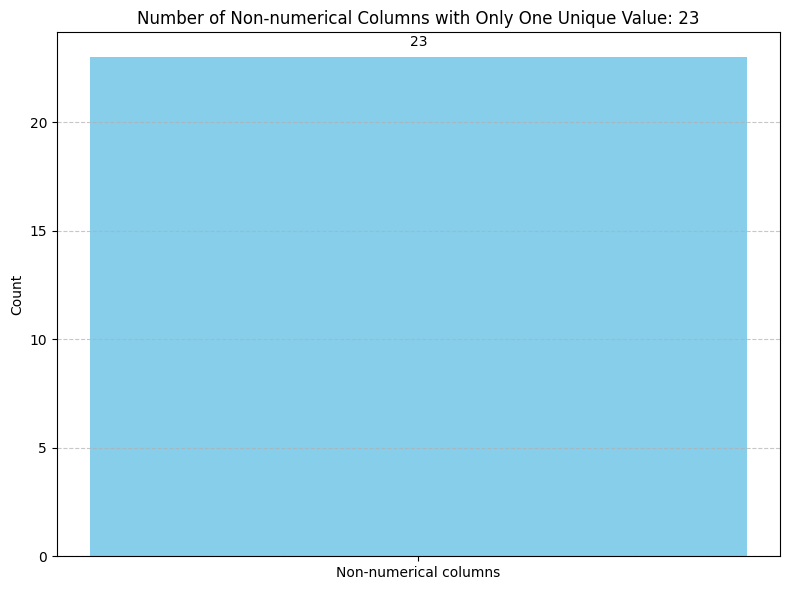

In [38]:
# Identify non-numerical columns with only one unique value
non_num_single_value_cols = []

for col in video_df.select_dtypes(exclude=[np.number, np.datetime64]).columns:
    # Check if column has only one unique value (and is not all NaN)
    if video_df[col].nunique() == 1 and video_df[col].notna().any():
        non_num_single_value_cols.append(col)

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Non-numerical columns'], [len(non_num_single_value_cols)], color='skyblue')
plt.title(f'Number of Non-numerical Columns with Only One Unique Value: {len(non_num_single_value_cols)}')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count label
plt.text(0, len(non_num_single_value_cols) + 0.5, str(len(non_num_single_value_cols)), ha='center')

plt.tight_layout()
plt.show()

In [39]:
# # Create subplots for non-numerical columns
# fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 18))
# axes = axes.ravel()

# # Plot count plot for each non-numerical column
# # Only show top 6 values in the count plot
# for idx, column in enumerate(non_num_col_df.columns):
#     # Only keep top 6 values
#     value_counts = non_num_col_df[column].value_counts()[:6]
#     # Convert index to string for consistent display
#     value_counts.index = value_counts.index.astype(str)

#     # Create horizontal bar plot
#     sns.barplot(x=value_counts.values, y=value_counts.index,
#                 ax=axes[idx], orient="h",
#                 color="skyblue", edgecolor="black")
#     axes[idx].set_title(f"Top 6 values in {column}")
#     axes[idx].set_xlabel("Count")
#     axes[idx].set_ylabel("")

# # Remove empty subplots
# for idx in range(len(non_num_col_df.columns), len(axes)):
#     fig.delaxes(axes[idx])

# # Adjust layout
# plt.tight_layout()
# plt.show()

**Nhận xét:**

- Với cột `video.videoQuality`: Ta thấy hầu hết video đều có chất lượng `normal`, tức là chất lượng video ở mức độ bình thường. Có một số video có chất lượng thấp hơn, nhưng tỷ lệ này không đáng kể.

- Với cột `video.encodedType`: Ta thấy hầu hết video đều được mã hóa theo cách thông thường để phù hợp với mục đích lưu trữ và truyền tải của TikTok.

- Ta thấy có nhiều cột không phải dạng số **chỉ chứa 1 giá trị duy nhất**. Các cột này không mang lại nhiều thông tin hữu ích trong quá trình phân tích, nên ta sẽ loại bỏ các cột này khỏi tập dữ liệu.


## 3.5. Loại bỏ các cột không có nhiều ý nghĩa trong quá trình phân tích


### 3.5.1. Loại bỏ một số cột chứa thông tin về ID của video


Cả 3 cột `id`, `video.id` và `video.videoID` đều là các cột ID duy nhất của video, nên ta sẽ loại bỏ 2 trong 3 cột này khỏi tập dữ liệu. Ta sẽ giữ lại cột `video.id` để đại diện cho ID của video.


In [40]:
# Drop video_id column
video_id_cols = ["id", "video.videoID"]
video_df = video_df.drop(columns=video_id_cols, axis=1, errors="ignore")

### 3.5.2. Loại bỏ một số cột chứa thông tin thống kê về video


Vì các cột có tên bắt đầu với `stats.*` chứa cùng thông tin với các cột có tên bắt đầu với `statsV2.*`, nhưng không có thông tin về `repostCount` như `statsV2.*`. Nên ta sẽ loại bỏ các cột có tên bắt đầu với `stats.*`.


In [41]:
# Remove columns starting with "stats."
stats_cols = video_df.columns[video_df.columns.str.startswith("stats.")]
video_df = video_df.drop(columns=stats_cols, axis=1, errors="ignore")

### 3.5.3. Loại bỏ các cột chỉ có 1 giá trị duy nhất


In [42]:
# Identify all columns with only one unique value
single_value_cols = []

for col in video_df.columns:
    # Check if column has only one unique value (and is not all NaN)
    if video_df[col].nunique() == 1 and video_df[col].notna().any():
        single_value_cols.append(col)

# Print information about columns to be removed
print(f"Found {len(single_value_cols)} columns with only 1 unique value.")
if len(single_value_cols) > 0:
    print(f"+----------------------------+-------+------------------+")
    print(f"| Column name                | Value | Missing rate (%) |")
    print(f"|----------------------------|-------|------------------|")

    # Show the columns and their values
    for col in single_value_cols:
        # Get the single value
        value = video_df[col].iloc[0]
        # Calculate number of missing values
        missing_rate = video_df[col].isnull().mean() * 100
        print(f"| {col:26} | {str(value):5} | {missing_rate:15.4f}% |")

    print(f"+----------------------------+-------+------------------+")

    # Drop the columns from the DataFrame
    video_df = video_df.drop(columns=single_value_cols)
    print(f"\nRemoved {len(single_value_cols)} columns.")
    print(f"DataFrame now has {video_df.shape[1]} columns.")
else:
    print("No columns to remove.")

Found 25 columns with only 1 unique value.
+----------------------------+-------+------------------+
| Column name                | Value | Missing rate (%) |
|----------------------------|-------|------------------|
| author.commentSetting      | 0.0   |          0.0000% |
| author.ftc                 | False |          0.0000% |
| author.isADVirtual         | False |          0.0000% |
| author.isEmbedBanned       | False |          0.0000% |
| author.privateAccount      | False |          0.0000% |
| author.relation            | 0.0   |          0.0000% |
| author.secret              | False |          0.0000% |
| authorStats.friendCount    | 0.0   |          0.0000% |
| collected                  | False |          0.0000% |
| digged                     | False |          0.0000% |
| duetDisplay                | 0.0   |          0.0000% |
| forFriend                  | False |          0.0000% |
| item_control.can_repost    | True  |          0.0000% |
| music.private              

### 3.5.4. Loại bỏ các cột chứa thông tin về ngôn ngữ gốc của video


Vì các video TikTok mà ta thu thập được đều hướng đến tệp khán giả là người Việt Nam, nên việc xác định ngôn ngữ gốc của video không còn quá quan trọng. Do đó, ta sẽ loại bỏ các cột chứa thông tin về ngôn ngữ gốc của video khỏi tập dữ liệu. Đó là các cột bắt đầu bằng `video.claInfo.originalLanguageInfo.`.


In [43]:
# Remove all columns starting with "video.claInfo.originalLanguageInfo."
original_language_cols = video_df.columns[video_df.columns.str.startswith(
    "video.claInfo.originalLanguageInfo.")]
video_df = video_df.drop(
    columns=original_language_cols, axis=1, errors="ignore")

### 3.5.5. Loại bỏ 1 cột cho biết số lượng tim (heart) của video


Kiểm tra xem cột `authorStats.heart` và `authorStats.heartCount` có chứa thông tin trùng lặp hay không.


In [44]:
# Check if two columns have the same values
has_same_values = video_df["authorStats.heart"].equals(
    video_df["authorStats.heartCount"])

if has_same_values:
    print("authorStats.heart và authorStats.heartCount có cùng giá trị.")
else:
    print("authorStats.heart và authorStats.heartCount có giá trị khác nhau.")

authorStats.heart và authorStats.heartCount có cùng giá trị.


Cả 2 cột `authorStats.heart` và `authorStats.heartCount` đều chứa thông tin về số lượng tim (heart) của chủ đã đăng tải video. Vì cả hai cột này chứa thông tin giống nhau, nên ta sẽ loại bỏ cột `authorStats.heart` khỏi tập dữ liệu.


In [45]:
# Remove "authorStats.heart" column
video_df = video_df.drop(columns="authorStats.heart", axis=1, errors="ignore")

### 3.5.6. Kết quả sau khi loại bỏ các cột không cần thiết


Số lượng cột trước và sau khi loại bỏ.


In [46]:
# Print confirmation
total_removed_cols = len(video_id_cols) + \
    len(stats_cols) + len(single_value_cols) + len(original_language_cols) + 1

print(f"Đã loại bỏ tổng cộng {total_removed_cols} cột.")
print(f"Tập dữ liệu còn lại {video_df.shape[1]} cột.")

Đã loại bỏ tổng cộng 37 cột.
Tập dữ liệu còn lại 50 cột.


## 3.6. Điền giá trị thích hợp vào các cột bị thiếu giá trị


### 3.6.1. Đối với các cột có kiểu dữ liệu số và không bị thiếu quá nhiều giá trị


Với các cột số có ít giá trị thiếu, chúng ta sẽ điền giá trị **trung vị** (của các giá trị không thiếu) vào chỗ trống. Cách này giúp giữ lại đặc điểm phân phối dữ liệu gốc nhiều nhất có thể, hạn chế ảnh hưởng đến phân tích sau này.


In [47]:
# Get the name of numerical columns
num_cols = video_df.select_dtypes(include=[np.number]).columns

# Fill missing values in numerical columns with the median
for col in num_cols:
    if video_df[col].isna().sum() > 0:
        median_value = video_df[col].median()
        video_df[col] = video_df[col].fillna(median_value)

### 3.6.2. Đối với các cột có kiểu dữ liệu không phải số và không bị thiếu quá nhiều giá trị


Với các cột không phải số có ít giá trị thiếu, chúng ta sẽ điền 1 giá trị đặc biệt là **"others"** vào chỗ trống. Cách này giúp giữ lại đặc điểm phân phối dữ liệu gốc nhiều nhất có thể, hạn chế ảnh hưởng đến phân tích sau này.


In [48]:
# Get the list of non-numerical columns
non_num_cols = video_df.select_dtypes(
    exclude=[np.number, np.datetime64]).columns

# Fill missing values in non-numerical columns with "others"
for col in non_num_cols:
    if video_df[col].isna().sum() > 0:
        video_df[col] = video_df[col].fillna("others")

## 3.7. Tổng kết quá trình tiền xử lý dữ liệu


Sau khi thực hiện nhiều bước để khám phá và tiền xử lý dữ liệu, ta đã có tập dữ liệu mới với các cột được xử lý một cách phù hợp. Khi này, ta sẽ sử dụng phương thức `info()` của `DataFrame` để kiểm tra lại thông tin của tập dữ liệu sau khi đã được tiền xử lý. Đây là tập dữ liệu mà ta sẽ sử dụng để thực hiện các phân tích để làm rõ những câu hỏi được đặt ra ở trên.


In [50]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70996 entries, 0 to 70995
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype                           
---  ------                           --------------  -----                           
 0   CategoryType                     70996 non-null  object                          
 1   author.downloadSetting           70996 non-null  object                          
 2   author.duetSetting               70996 non-null  object                          
 3   author.id                        70996 non-null  object                          
 4   author.nickname                  70996 non-null  object                          
 5   author.openFavorite              70996 non-null  object                          
 6   author.secUid                    70996 non-null  object                          
 7   author.signature                 70996 non-null  object                          
 8   author.stitchSet

# 4. Rút trích đặc trưng (Feature Engineering)


## 4.1. Trích xuất các hashtag từ mô tả của video (`desc`)


Đầu tiên, ta cần tiền xử lý thông tin trong cột `desc` để rút trích ra các hashtag. Để làm điều này, ta sẽ sử dụng thư viện `re` của Python để tìm kiếm các chuỗi bắt đầu bằng dấu `#` trong mỗi mô tả.


1. Lấy danh sách tên của các chủ tài khoản TikTok. Ta muốn đảm bảo rằng các hashtag không chứa tên của các chủ tài khoản này.

In [51]:
# Get a set of all authors' unique IDs
unique_authors = video_df["author.uniqueId"].unique()
# Lowercase all unique IDs
unique_authors = set([unidecode(author.lower()) for author in unique_authors])
print(
    f"Có tổng cộng {len(unique_authors)} nhà sáng tạo nội dung trong tập dữ liệu.")

Có tổng cộng 264 nhà sáng tạo nội dung trong tập dữ liệu.


2. Hàm tiện ích để trích xuất các hashtag từ mô tả của video.

In [52]:
def extract_hashtags(text: str):
    """Extract hashtags from text.

    Args:
        text (str): The text to extract hashtags from.

    Returns:
        list: A list of hashtags found in the text.
    """
    if not isinstance(text, str):
        return []

    # Add a space before each hashtag to
    # avoid matching words like "class" or "pass"
    text = re.sub(r'#', ' #', text)

    # Find hashtags - # followed by non-whitespace characters
    hashtag_pattern = r'#(\S+)'
    hashtags = re.findall(hashtag_pattern, text)

    # Remove trailing punctuation
    cleaned_hashtags = set()
    for tag in hashtags:
        # Remove trailing punctuation
        # and convert to lowercase
        clean_tag = tag.rstrip('.,:;!?"\')(').lower()

        # Chuyển đổi sang không dấu
        clean_tag = unidecode(clean_tag)

        # # Check if the hashtag has high similarity with an author
        # if clean_tag in unique_authors:
        #     continue
        # for author in unique_authors:
        #     if author.startswith(clean_tag) or author.endswith(clean_tag) or clean_tag in author:
        #         continue

        if clean_tag:  # Only add if not empty
            cleaned_hashtags.add(clean_tag)

    return list(cleaned_hashtags)

In [53]:
# from unidecode import unidecode

# # Chuỗi ban đầu
# s = "Chân gà sả tắc"

# # Chuyển đổi sang không dấu
# result = unidecode(s)

# s = "Hello, World! Python is amazing."
# s = "Description: Bữa tiệc bánh ngọt quá đã 🤤#angithuongoi #mukbang #odouceursbakery #xuhuongtiktok #ancungtiktok #longervideos #banhngot"

# unidecode(s)

3. Trích xuất các hashtag từ mô tả của video.


In [54]:
# Extract hashtags from descriptions
video_df['hashtags'] = video_df['desc'].apply(extract_hashtags) # ~ 30s

Kiểm tra kết quả

In [55]:
indices = video_df.sample(n=5).index
for i in indices:
    print(f"Author: {video_df.loc[i, 'author.uniqueId']}")
    print(f"Description: {video_df.loc[i, 'desc']}")
    print(f"Hashtags: {video_df['hashtags'][i]}")
    print()
# for i in indices:

Author: 1108ng
Description: Khoai nướng bằng nồi chiên không dầu mềm, dẻo, không hề khô 😋 #ăncungtiktok #cooking #monngonmoingay #homnayangi #nauancungtiktok 
Hashtags: ['cooking', 'monngonmoingay', 'homnayangi', 'nauancungtiktok', 'ancungtiktok']

Author: bachuareview
Description: sướng nhất anh em văn phòng khu đống đa rùii📍mommy steak - 176+178 thái thịnh #vtmgr #ancungtiktok #LearnOnTikTok #WomenofTikTok 
Hashtags: ['ancungtiktok', 'vtmgr', 'womenoftiktok', 'learnontiktok']

Author: muoidian
Description: Bánh cuốn 25 cành toppping 5 loại #muoidian #reviewanngon #ancungtiktok #banhcuon #quan11angi #vtvcab 
Hashtags: ['muoidian', 'reviewanngon', 'vtvcab', 'quan11angi', 'banhcuon', 'ancungtiktok']

Author: sukiii00129
Description: 📍🌲 28 địa điểm ăn uống Đà Lạt cho chuyến đi sắp tới của bạn 🤭 #hungrysukiii #learnontiktok #sukiiididau #reviewfood #streetfood #localfood #xuhuong #dalat 
Hashtags: ['localfood', 'reviewfood', 'hungrysukiii', 'learnontiktok', 'sukiiididau', 'dalat', 'street

```txt
Description: Review chi nhánh Haidilao Vincom Đồng Khởi #Haidilao #tiktokfood #ăncùngtiktok

Hashtags: ['haidilao', 'tiktokfood', 'ancungtiktok']
```


Tạo ra một cột cho biết số lượng hashtag được đính kèm trong mỗi video.

In [56]:
# Count the number of hashtags in each description
video_df['hashtag_count'] = video_df['hashtags'].apply(len)

Kết quả:

In [60]:
# Display some statistics about hashtags
print(f"Total number of videos: {len(video_df)}")
print(f"Total videos with hashtags: {(video_df['hashtag_count'] > 0).sum()}")
print(
    f"Percentage of videos with hashtags: {(video_df['hashtag_count'] > 0).mean()*100:.2f}%")
print(
    f"Average number of hashtags per video: {video_df['hashtag_count'].mean():.2f}")

Total number of videos: 70996
Total videos with hashtags: 70650
Percentage of videos with hashtags: 99.51%
Average number of hashtags per video: 6.85


In [61]:
# Find the most common hashtags
all_hashtags = [tag for tags in video_df['hashtags'] for tag in tags]
top_hashtags = Counter(all_hashtags).most_common(20)
print("===== Top 20 hashtags =====")
for tag, count in top_hashtags:
    print(f"{tag:20}: {count}")

===== Top 20 hashtags =====
ancungtiktok        : 50231
learnontiktok       : 30866
reviewanngon        : 22232
xuhuong             : 20930
mukbang             : 9876
fyp                 : 9668
vtmgr               : 8377
food                : 7590
viral               : 7285
monngonmoingay      : 6154
foodreview          : 4863
xuhuongtiktok       : 4156
trending            : 4035
foodtiktok          : 3834
nauancungtiktok     : 3591
review              : 3430
tiktokfood          : 2955
anvat               : 2902
homnayangi          : 2801
thanhthoiluottet    : 2626


In [63]:
# Display a sample of videos with hashtags
video_df[['desc', 'hashtags', 'hashtag_count']].head()

,desc,hashtags,hashtag_count
0,Combo 10k mua được gì tại cửa hàng tiện lợi #M...,"[combo, xucxich, cuahangtienloi, conveniencest...",8
1,Combo 9k mua được gì tại cửa hàng tiện lợi #Ăn...,"[combo, virralvideo, soda, cuahangtienloi, con...",9
2,"Combo 10k mua được gì tại cửa hàng tiện lợi , ...","[combo, xucxich, conveniencestore, mukbang, on...",7
3,Combo 20k mua được gì tại cửa hàng tiện lợi #M...,"[500k, combo, 10k, 15k, snack, xucxich, cuahan...",14
4,Combo 5k mua được gì tại cửa hàng tiện lợi #Mu...,"[500k, 15k, 10k, snack, cuahangtienloi, conven...",11


## 4.2. Trích xuất năm và tuần-trong-năm mà tác giả đã đăng video

Ta sẽ trích xuất thông tin về năm (year) và tuần-trong-năm (week of year) mà tác giả đã đăng video từ cột `createTime`. Thông tin này sẽ giúp ta hiểu rõ hơn về tần suất đăng video của tác giả qua từng năm và từng tuần trong năm.


In [64]:
# Extract "year" and "week of year" from the "createTime" column
video_df["createTime_year"] = \
    video_df['createTime'].dt.year.astype(np.uint8)
video_df["createTime_week"] = \
    video_df['createTime'].dt.isocalendar().week.astype(np.uint8)

Ta sẽ kết hợp thông tin về năm và tuần-trong-năm vào một cột mới có tên là `year_week`.

In [65]:
# Create a new column combining the year and week of year, named "year_week"
# If week of year is less than 10, add a leading zero
# Example: Year 2024, Week 4 => "Y2024_W04"
video_df['year_week'] = \
    "Y" + video_df["createTime_year"].astype(str) + \
    "_W" + video_df["createTime_week"].apply(lambda x: f"{x:02d}")

Vẽ biểu đồ cột thể hiện số lượng video được đăng theo từng tuần trong mỗi năm.

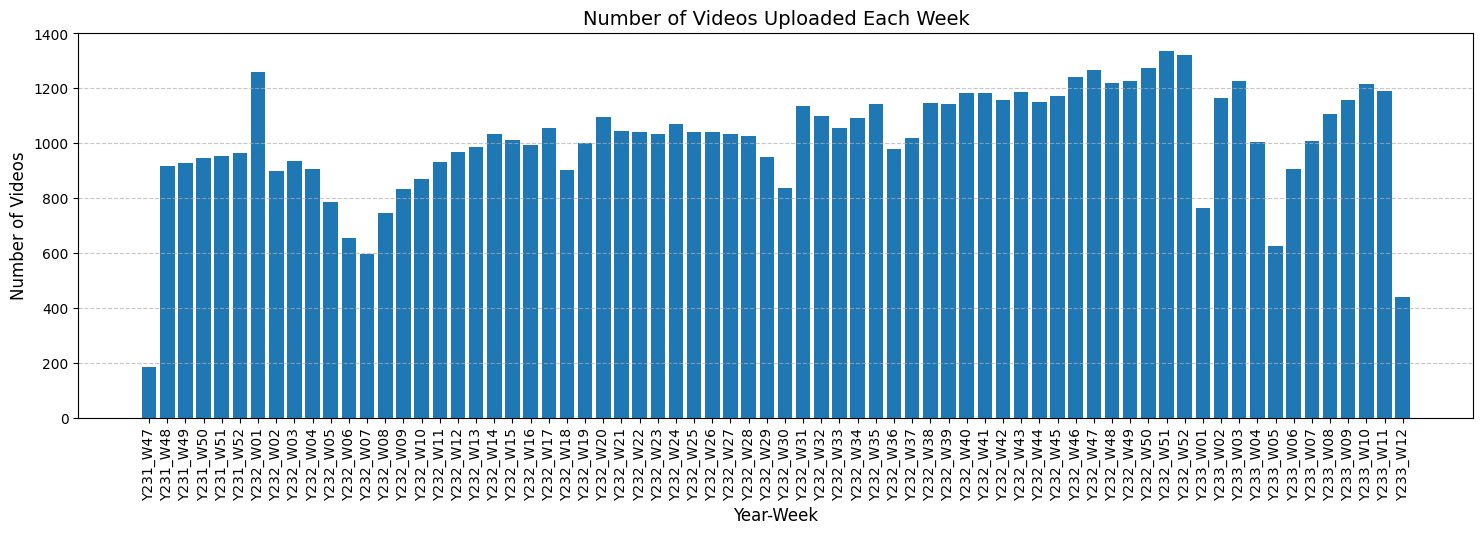

In [67]:
# Count videos by year_week
year_week_counts = video_df['year_week'].value_counts().sort_index()

# Create a figure with appropriate size
plt.figure(figsize=(18, 5))

# Create the bar plot
plt.bar(year_week_counts.index, year_week_counts.values)

# Set title and labels
plt.title('Number of Videos Uploaded Each Week', fontsize=14)
plt.xlabel('Year-Week', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Lọc ra top 50 video có lượt xem cao nhất theo mỗi tuần trong mỗi năm. Tức là ta sẽ nhóm dữ liệu theo cột "year_week" và sau đó lấy ra top 50 video có lượt xem cao nhất trong mỗi nhóm.

In [57]:
# Group data by column "year_week" and get top 50 most viewed videos
top_viewed_videos = video_df.groupby('year_week') \
    .apply(lambda x: x.nlargest(50, 'statsV2.playCount')) \
    .reset_index(drop=True)

# Sort data by "year_week" and "statsV2.playCount"
top_viewed_videos = top_viewed_videos.sort_values(
    by=['year_week', 'statsV2.playCount'], ascending=[True, False])

# Print the shape of the DataFrame
print(f"Shape of the DataFrame: {top_viewed_videos.shape}")

Shape of the DataFrame: (3500, 55)


/tmp/ipykernel_12137/1969268351.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(50, 'statsV2.playCount')) \


In [58]:
# Save the top viewed videos to a Parquet file
top_viewed_videos.to_parquet("../top_viewed_videos.parquet", index=False)

# Read the top viewed videos from the Parquet file and print information
pd.read_parquet("../top_viewed_videos.parquet").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype                           
---  ------                           --------------  -----                           
 0   CategoryType                     3500 non-null   object                          
 1   author.downloadSetting           3500 non-null   object                          
 2   author.duetSetting               3500 non-null   object                          
 3   author.id                        3500 non-null   object                          
 4   author.nickname                  3500 non-null   object                          
 5   author.openFavorite              3500 non-null   object                          
 6   author.secUid                    3500 non-null   object                          
 7   author.signature                 3500 non-null   object                          
 8   author.stitchSetti

## 4.2. Tính điểm cho video

## 4.3. Trích xuất transcript

## 4.4. + 4.5

# 5. Lưu dữ liệu đã tiền xử lý và rút trích đặc trưng xuống file Parquet


Sau quá trình tiền xử lý và rút trích đặc trưng, ta sẽ lưu dữ liệu xuống file Parquet để sử dụng cho các bước phân tích và mô hình hóa tiếp theo. Định dạng Parquet giúp tiết kiệm dung lượng lưu trữ, giữ nguyên kiểu dữ liệu của các cột và tăng tốc quá trình đọc/ghi dữ liệu.


In [59]:
# Save the preprocessed data to a Parquet file
video_df.to_parquet("../preprocessed_videos.parquet", index=False)

---
# END
---


In [60]:
df = pd.read_parquet("../preprocessed_videos.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70996 entries, 0 to 70995
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype                           
---  ------                           --------------  -----                           
 0   CategoryType                     70996 non-null  object                          
 1   author.downloadSetting           70996 non-null  object                          
 2   author.duetSetting               70996 non-null  object                          
 3   author.id                        70996 non-null  object                          
 4   author.nickname                  70996 non-null  object                          
 5   author.openFavorite              70996 non-null  object                          
 6   author.secUid                    70996 non-null  object                          
 7   author.signature                 70996 non-null  object                          
 8   author.stitchSet

In [5]:
author_cols = df.columns[df.columns.str.startswith("author")]
df[author_cols].head()

,author.downloadSetting,author.duetSetting,author.id,author.nickname,author.openFavorite,author.secUid,author.signature,author.stitchSetting,author.uniqueId,author.verified,authorStats.diggCount,authorStats.followerCount,authorStats.followingCount,authorStats.heartCount,authorStats.videoCount
0,3.0,3.0,7009454289408099355,Ông Duy MUKBANG,False,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,ongduymukbang,False,3219.0,411000.0,9398.0,6800000.0,774.0
1,3.0,3.0,7009454289408099355,Ông Duy MUKBANG,False,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,ongduymukbang,False,3219.0,411000.0,9398.0,6800000.0,774.0
2,3.0,3.0,7009454289408099355,Ông Duy MUKBANG,False,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,ongduymukbang,False,3219.0,411000.0,9398.0,6800000.0,774.0
3,3.0,3.0,7009454289408099355,Ông Duy MUKBANG,False,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,ongduymukbang,False,3219.0,411000.0,9398.0,6800000.0,774.0
4,3.0,3.0,7009454289408099355,Ông Duy MUKBANG,False,MS4wLjABAAAA6wo72m8EjJ-uGnr89fIj5pxt57pO6mKZhd...,Ông Duy Mukbang mọi lúc mọi nơi \nĐăng ký miễn...,3.0,ongduymukbang,False,3219.0,411000.0,9398.0,6800000.0,774.0


In [60]:
df["hashtags"]

0        [xucxich, mukbang, combo, cuahangtienloi, asmr...
1        [soda, mukbang, combo, cuahangtienloi, virralv...
2        [xucxich, mukbang, combo, asmr, conveniencesto...
3        [mitom, xucxich, mukbang, combo, 5k, cuahangti...
4        [mukbang, 5k, cuahangtienloi, 500k, snack, asm...
                               ...                        
70991    [chaoxian, xuhuong, mukbang, nhahang, mukbangv...
70992    [chaoxian, mukbang, chillguy, fyp, mukbangvide...
70993    [chaoxian, xuhuong, mukbang, nhahang, mukbangv...
70994    [chaoxian, xuhuong, nhahang, mukbangvideo, lau...
70995    [chaoxian, xuhuong, mukbang, learnontiktok, nh...
Name: hashtags, Length: 70996, dtype: object

In [61]:
df["hashtags"].explode()

0               xucxich
0               mukbang
0                 combo
0        cuahangtienloi
0                  asmr
              ...      
70995           mukbang
70995     learnontiktok
70995           nhahang
70995    laubotrieuchau
70995      ancungtiktok
Name: hashtags, Length: 486592, dtype: object

In [74]:
new_video_df = video_df.copy()

In [76]:
# Convert a list to a string concatenated by whitespace
new_video_df["hashtags"] = new_video_df["hashtags"].apply(
    lambda x: " ".join(x))
new_video_df["hashtags"]

0        combo ancungtiktok cuahangtienloi xucxich mukb...
1        soda combo ancungtiktok cuahangtienloi virralv...
2        combo ancungtiktok xucxich mukbang convenience...
3        5k snack mitom 10k combo ancungtiktok cuahangt...
4        5k snack 10k cuahangtienloi mukbang convenienc...
                               ...                        
70991    chaoxian laubotrieuchau xuhuong mukbangvideo a...
70992     chaoxian chill mukbangvideo fyp chillguy mukbang
70993    chaoxian laubotrieuchau xuhuong mukbangvideo a...
70994    chaoxian laubotrieuchau xuhuong mukbangvideo a...
70995    chaoxian laubotrieuchau xuhuong mukbang learno...
Name: hashtags, Length: 70996, dtype: object

In [ ]:
# new_video_df["hashtags"].dropna().str.split().explode()

0                 combo
0          ancungtiktok
0        cuahangtienloi
0               xucxich
0               mukbang
              ...      
70995           xuhuong
70995           mukbang
70995     learnontiktok
70995           nhahang
70995      ancungtiktok
Name: hashtags, Length: 455827, dtype: object

In [78]:
new_video_df.to_csv("../data/processed/cleaned_video_info.csv",
                    index=False)

In [82]:
# Read createTime as datetime64[ns] data type
new_df = pd.read_csv("../data/processed/cleaned_video_info.csv",
                     parse_dates=["createTime", "collectTime"])

In [83]:
new_df['createTime']

0       2025-02-05 12:20:55
1       2024-08-15 13:31:48
2       2024-03-13 13:17:36
3       2025-03-18 12:07:44
4       2025-03-16 12:00:52
                ...        
70991   2024-11-27 15:12:13
70992   2024-11-26 05:17:11
70993   2024-11-24 15:00:26
70994   2024-11-23 15:00:47
70995   2024-11-22 15:06:40
Name: createTime, Length: 70996, dtype: datetime64[ns]

In [80]:
new_df['hashtags'].dropna().str.split().explode()

0                 combo
0          ancungtiktok
0        cuahangtienloi
0               xucxich
0               mukbang
              ...      
70995           xuhuong
70995           mukbang
70995     learnontiktok
70995           nhahang
70995      ancungtiktok
Name: hashtags, Length: 455449, dtype: object

## List all columns in the dataset


In [48]:
# # Check if two columns have the same values
# same_values = video_df["authorStats.heart"].equals(
#     video_df["authorStats.heartCount"])
# print(
#     f"authorStats.heart và authorStats.heartCount có cùng giá trị: {same_values}")
for col in video_df[["textLanguage", "textTranslatable"]].columns:
    print(f"Column: {col}")
    print(video_df[col].value_counts(dropna=False))
    print()

Column: textLanguage
textLanguage
vi         70367
un           301
en           208
id            17
it            13
fi            12
es             8
pt             7
ms             6
hu             5
ht             4
fr             4
ja             3
is             2
co             2
pl             2
zh-Hans        2
ca             2
gd             2
jv             2
no             2
de             2
eu             2
kmr            1
ro             1
tr             1
sr             1
ig             1
sv             1
te             1
nl             1
xh             1
et             1
sk             1
km             1
cy             1
sl             1
tl             1
sn             1
uz             1
la             1
eo             1
bs             1
sw             1
Name: count, dtype: int64

Column: textTranslatable
textTranslatable
True     70659
False      337
Name: count, dtype: int64



In [ ]:
my_df = video_df[video_df["video.claInfo.hasOriginalAudio"] == False]
a = my_df["author.uniqueId"]
b = my_df["video.id"]
print(my_df.shape)
for row_id in range(80):
    url = f"https://www.tiktok.com/@{a.iloc[row_id]}/video/{b.iloc[row_id]}"
    print(url)

In [45]:
# list columns starting with "video."
video_cols = video_df.columns[video_df.columns.str.startswith("author.")]
for col in video_cols:
    print(video_df[col].value_counts())
    print()

author.downloadSetting
0.0    54226
3.0    16770
Name: count, dtype: int64

author.duetSetting
0.0    65090
3.0     4856
1.0     1050
Name: count, dtype: int64

author.id
7163686821477729306    934
6922569104567010305    893
7345796533974270994    872
6741580738694775809    749
7297243221116109830    745
                      ... 
7377647868423619585     31
7440016314036552724     27
6943172800782009346     13
7393937601256326151     13
6534453457280729090     12
Name: count, Length: 264, dtype: int64

author.nickname
Muoidian              934
TÍNH TUNG TĂNG        893
Thích Gì Ăn Đó        872
Đi Cùng Phúc          749
tunauan68             745
                     ... 
Lê Thanh Tuấn          31
Đăng Mukbang           27
🇰🇷Chú Hanquốc ở 🇻🇳     13
Bé Mụp                 13
Hôm Nay Tui Ăn Gì      12
Name: count, Length: 263, dtype: int64

author.openFavorite
False    69825
True      1171
Name: count, dtype: int64

author.secUid
MS4wLjABAAAAI8XcDTgrBv9V3R2Mt4R1hB3ADydjhTq2jc-by6ji7fkjRge

In [86]:
video_df[["author.id", "author.uniqueId", "author.nickname"]]

,author.id,author.uniqueId,author.nickname
0,7009454289408099355,ongduymukbang,Ông Duy MUKBANG
1,7009454289408099355,ongduymukbang,Ông Duy MUKBANG
2,7009454289408099355,ongduymukbang,Ông Duy MUKBANG
3,7009454289408099355,ongduymukbang,Ông Duy MUKBANG
4,7009454289408099355,ongduymukbang,Ông Duy MUKBANG
...,...,...,...
70991,7440016314036552724,dangmukbangbo,Đăng Mukbang
70992,7440016314036552724,dangmukbangbo,Đăng Mukbang
70993,7440016314036552724,dangmukbangbo,Đăng Mukbang
70994,7440016314036552724,dangmukbangbo,Đăng Mukbang


In [ ]:
# Sort column names
all_cols = video_df.columns
sorted_cols = sorted(all_cols)

for col in sorted_cols:
    # Print column name and missing rate
    missing_rate = video_df[col].isnull().mean()
    print(f"{col:40}: {missing_rate:.1%}")

    # Print column name
    # print(col)

CategoryType                            : 0.0%
author.downloadSetting                  : 0.0%
author.duetSetting                      : 0.0%
author.id                               : 0.0%
author.nickname                         : 0.0%
author.openFavorite                     : 0.0%
author.secUid                           : 0.0%
author.signature                        : 1.2%
author.stitchSetting                    : 0.0%
author.uniqueId                         : 0.0%
author.verified                         : 0.0%
authorStats.diggCount                   : 0.0%
authorStats.followerCount               : 0.0%
authorStats.followingCount              : 0.0%
authorStats.heartCount                  : 0.0%
authorStats.videoCount                  : 0.0%
collectTime                             : 0.0%
createTime                              : 0.0%
desc                                    : 0.1%
diversificationId                       : 5.6%
isAd                                    : 0.0%
itemCommentSt